In [1]:
#Import the libraries that we are going to use 
import pandas as pd
import numpy as np
import re
import graphviz
import nltk
from nltk.corpus import stopwords
from numpy import array
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import visualkeras
import pickle
import keras
from PIL import ImageFont
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM,MaxPooling1D,Bidirectional
from tensorflow.keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from sklearn.model_selection import train_test_split
from IPython.display import Image

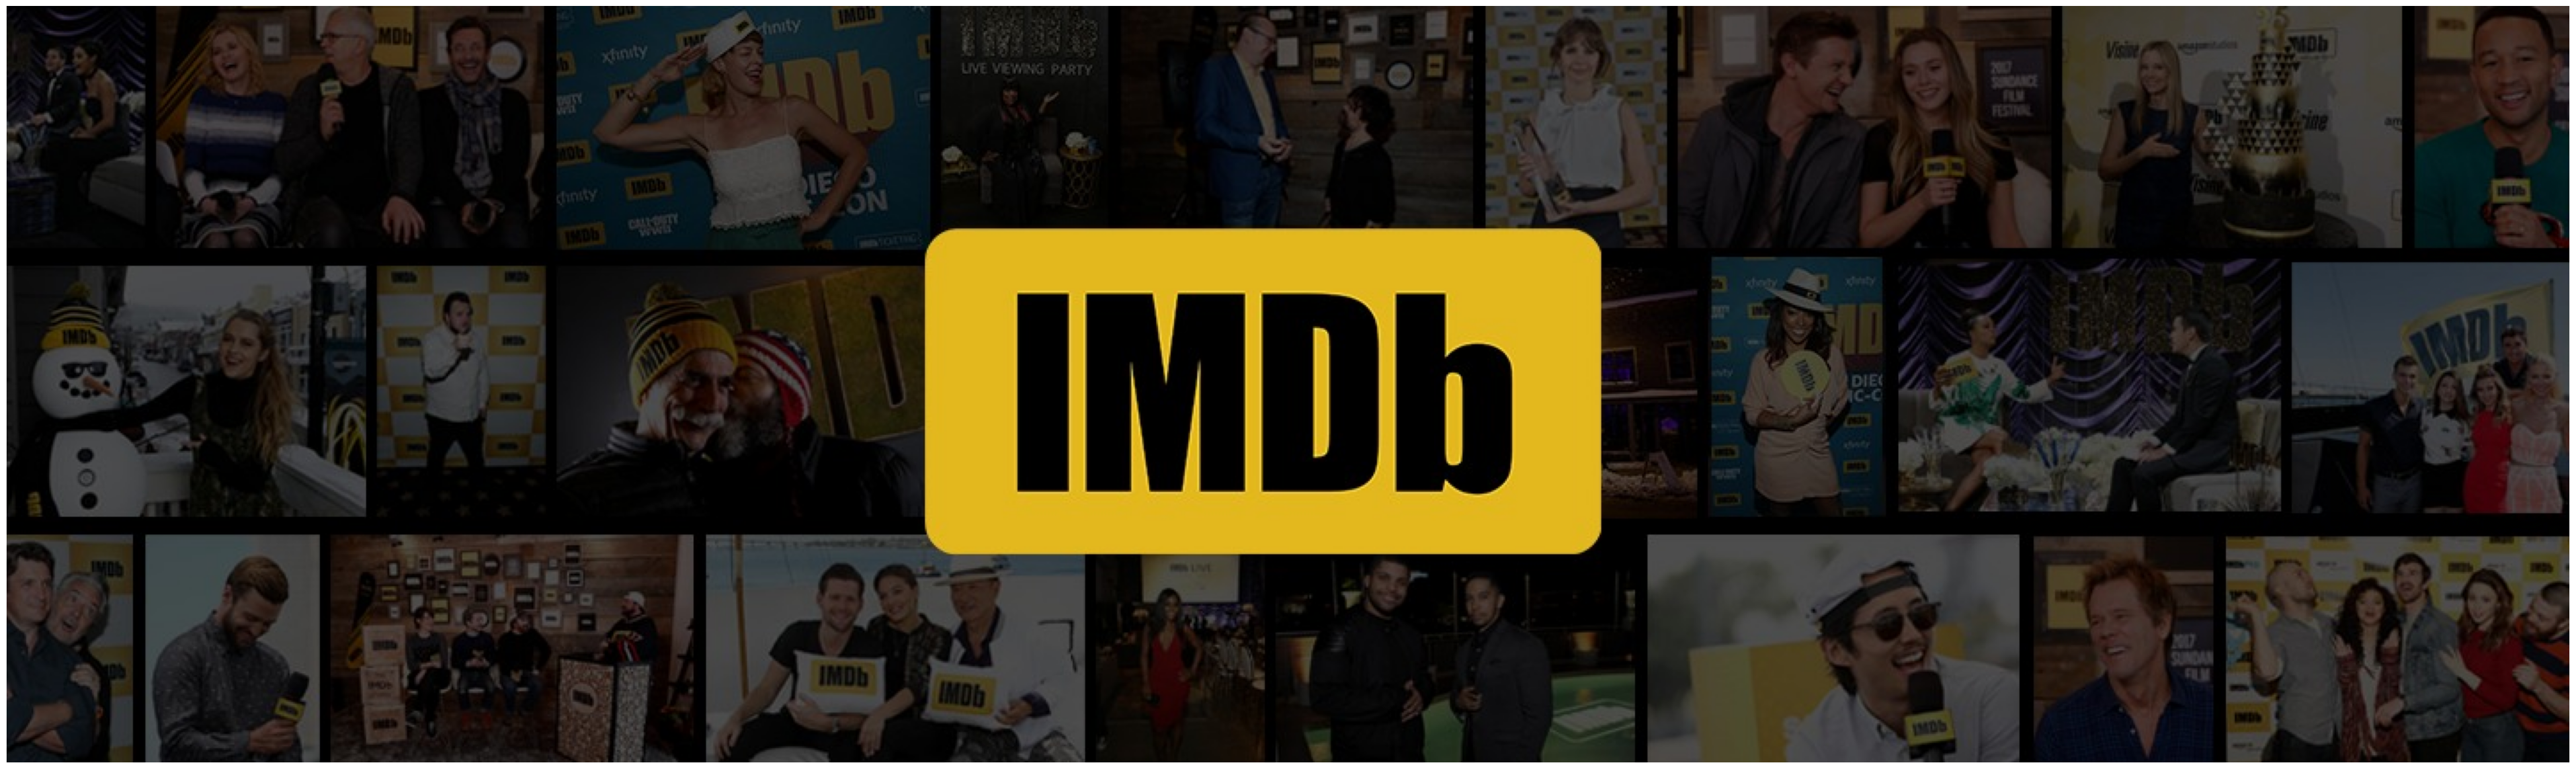

In [2]:
img = mpimg.imread(r"C:\Users\XP STORE\Downloads\8b955864-7307-4d41-8ded-c194170f5305-2729152590.jpg")
plt.figure(figsize=(50, 50))
plt.imshow(img)
plt.axis('off')
plt.show()

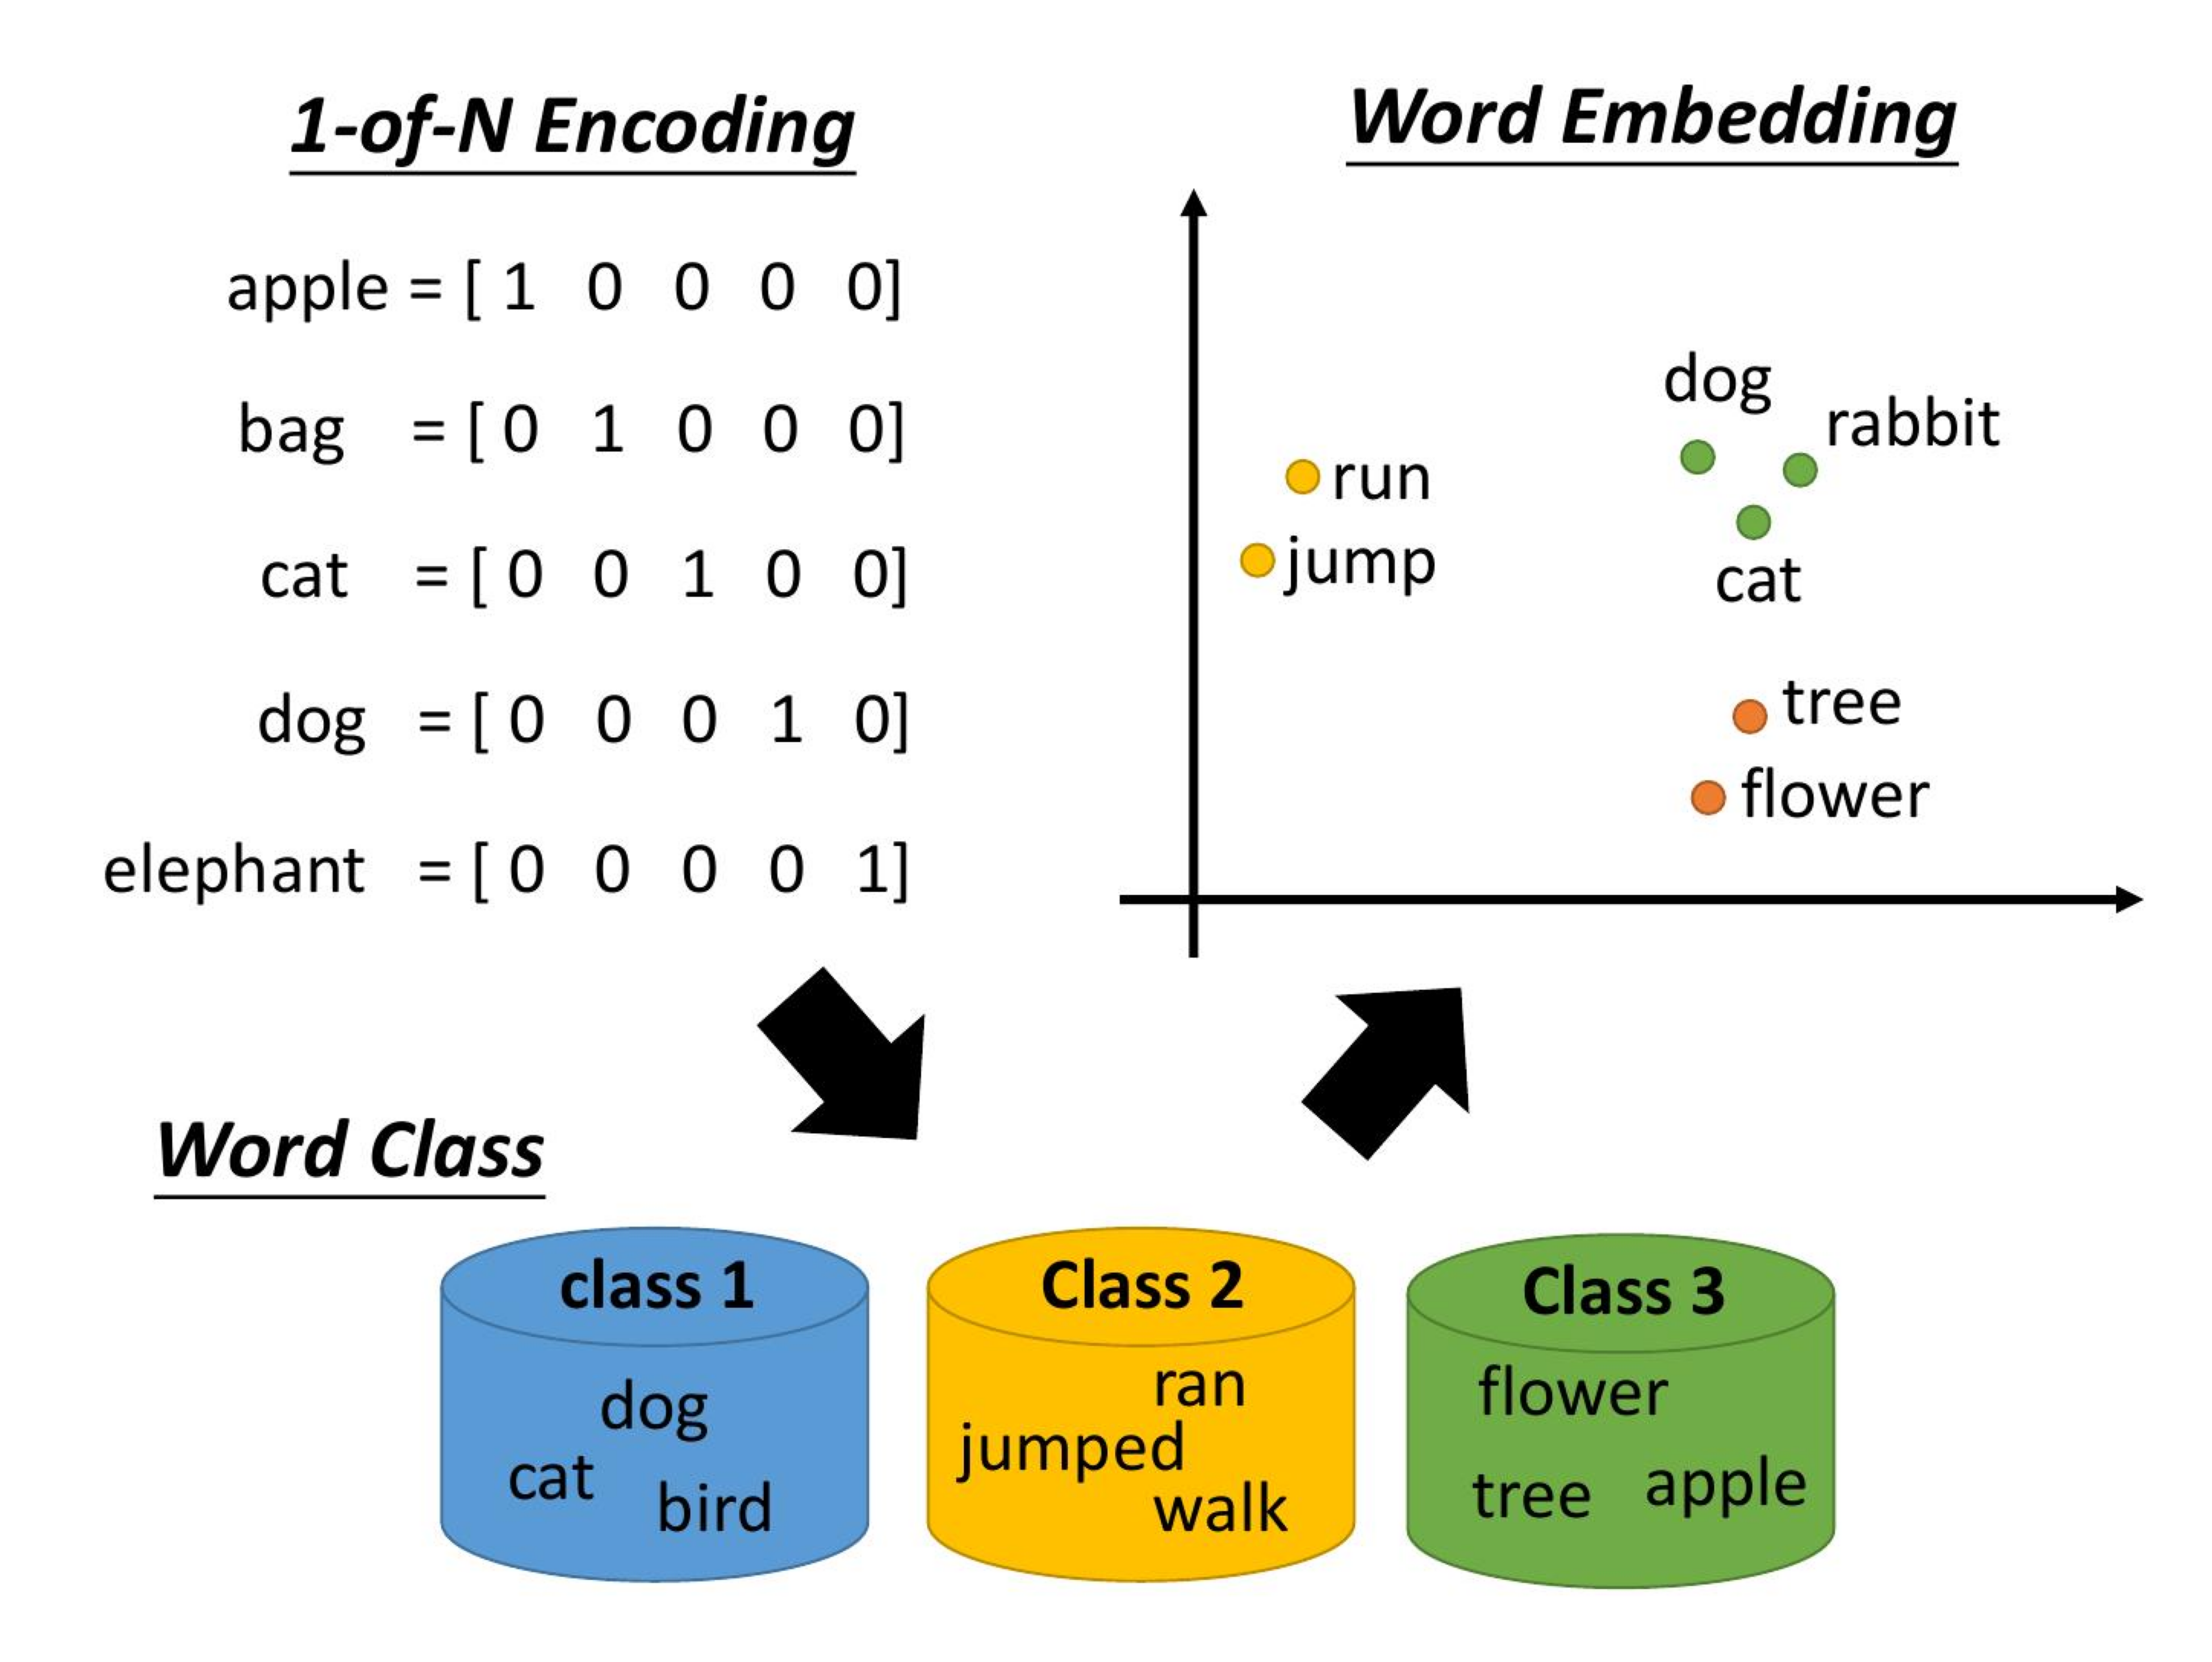

In [3]:
img = mpimg.imread(r"C:\Users\XP STORE\Downloads\Unsupervised_Learning_Word_Embedding_1440-03.jpg")
plt.figure(figsize=(50, 50))
plt.imshow(img)
plt.axis('off')
plt.show()

In [4]:
# Open the GloVe file
glove_file = open('a2_glove.6B.100d.txt', 'r', encoding='utf-8')

# Open the IMDB dataset
movie_reviews = pd.read_csv('a1_IMDB_Dataset.csv')


In [5]:
movie_reviews.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [6]:
movie_reviews.shape

(50000, 2)

In [7]:
# Checking for missing values
movie_reviews.isnull().sum()

review       0
sentiment    0
dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

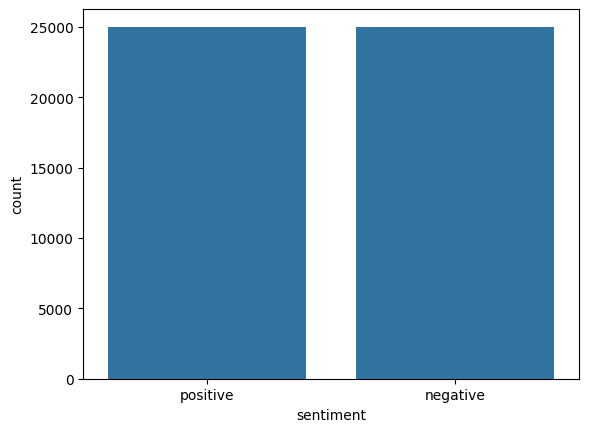

In [8]:
# Let's observe distribution of positive / negative sentiments in dataset

import seaborn as sns
sns.countplot(x='sentiment', data=movie_reviews)

In [9]:
movie_reviews["review"][2]

# You can see that our text contains punctuations, brackets, HTML tags and numbers 

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

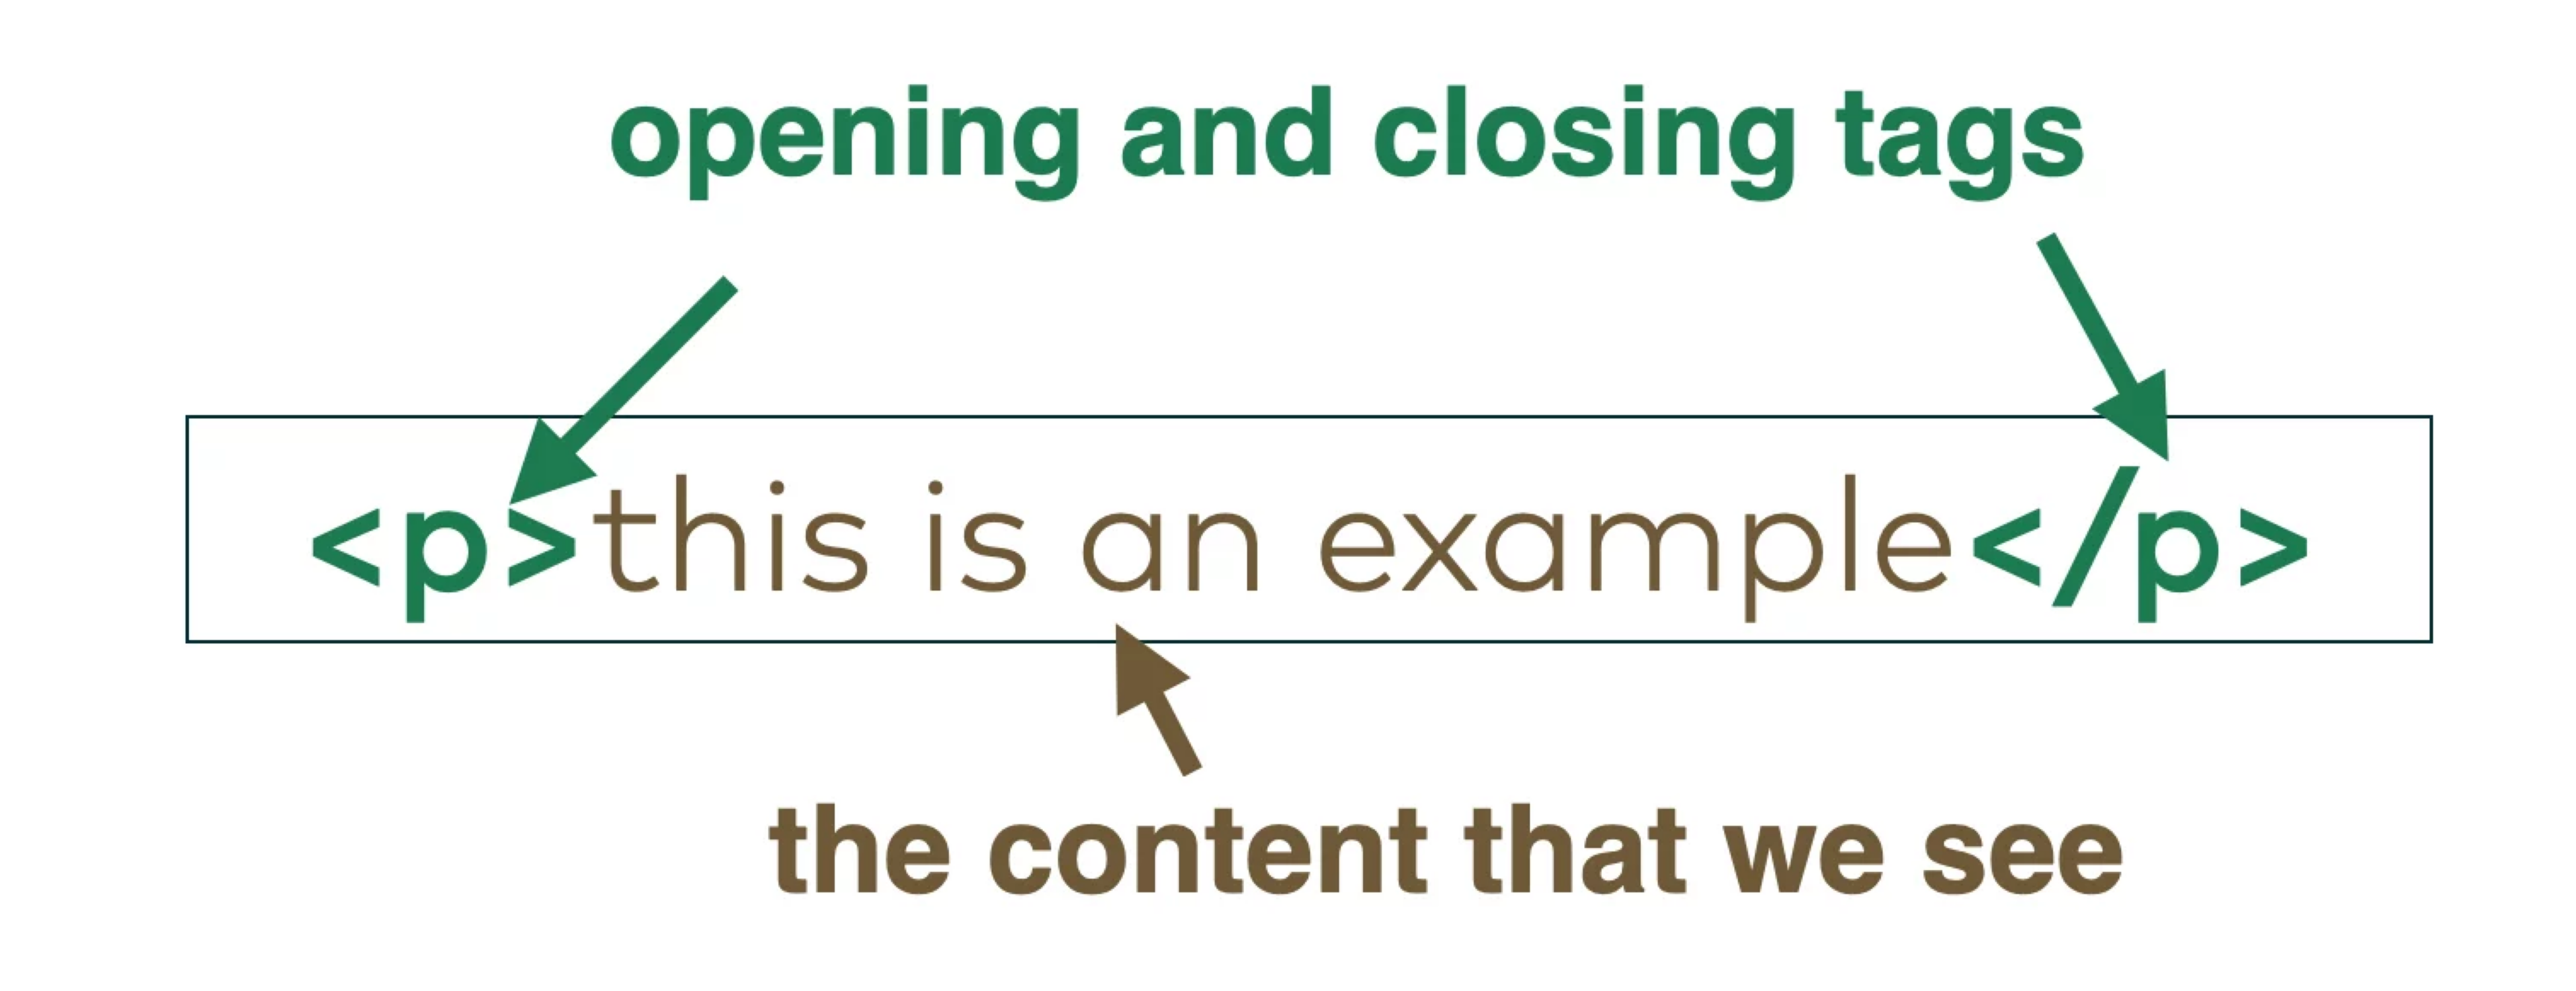

In [10]:
img = mpimg.imread(r"C:\Users\XP STORE\Downloads\html-content-web-scraping.webp")
plt.figure(figsize=(50, 50))
plt.imshow(img)
plt.axis('off')
plt.show()

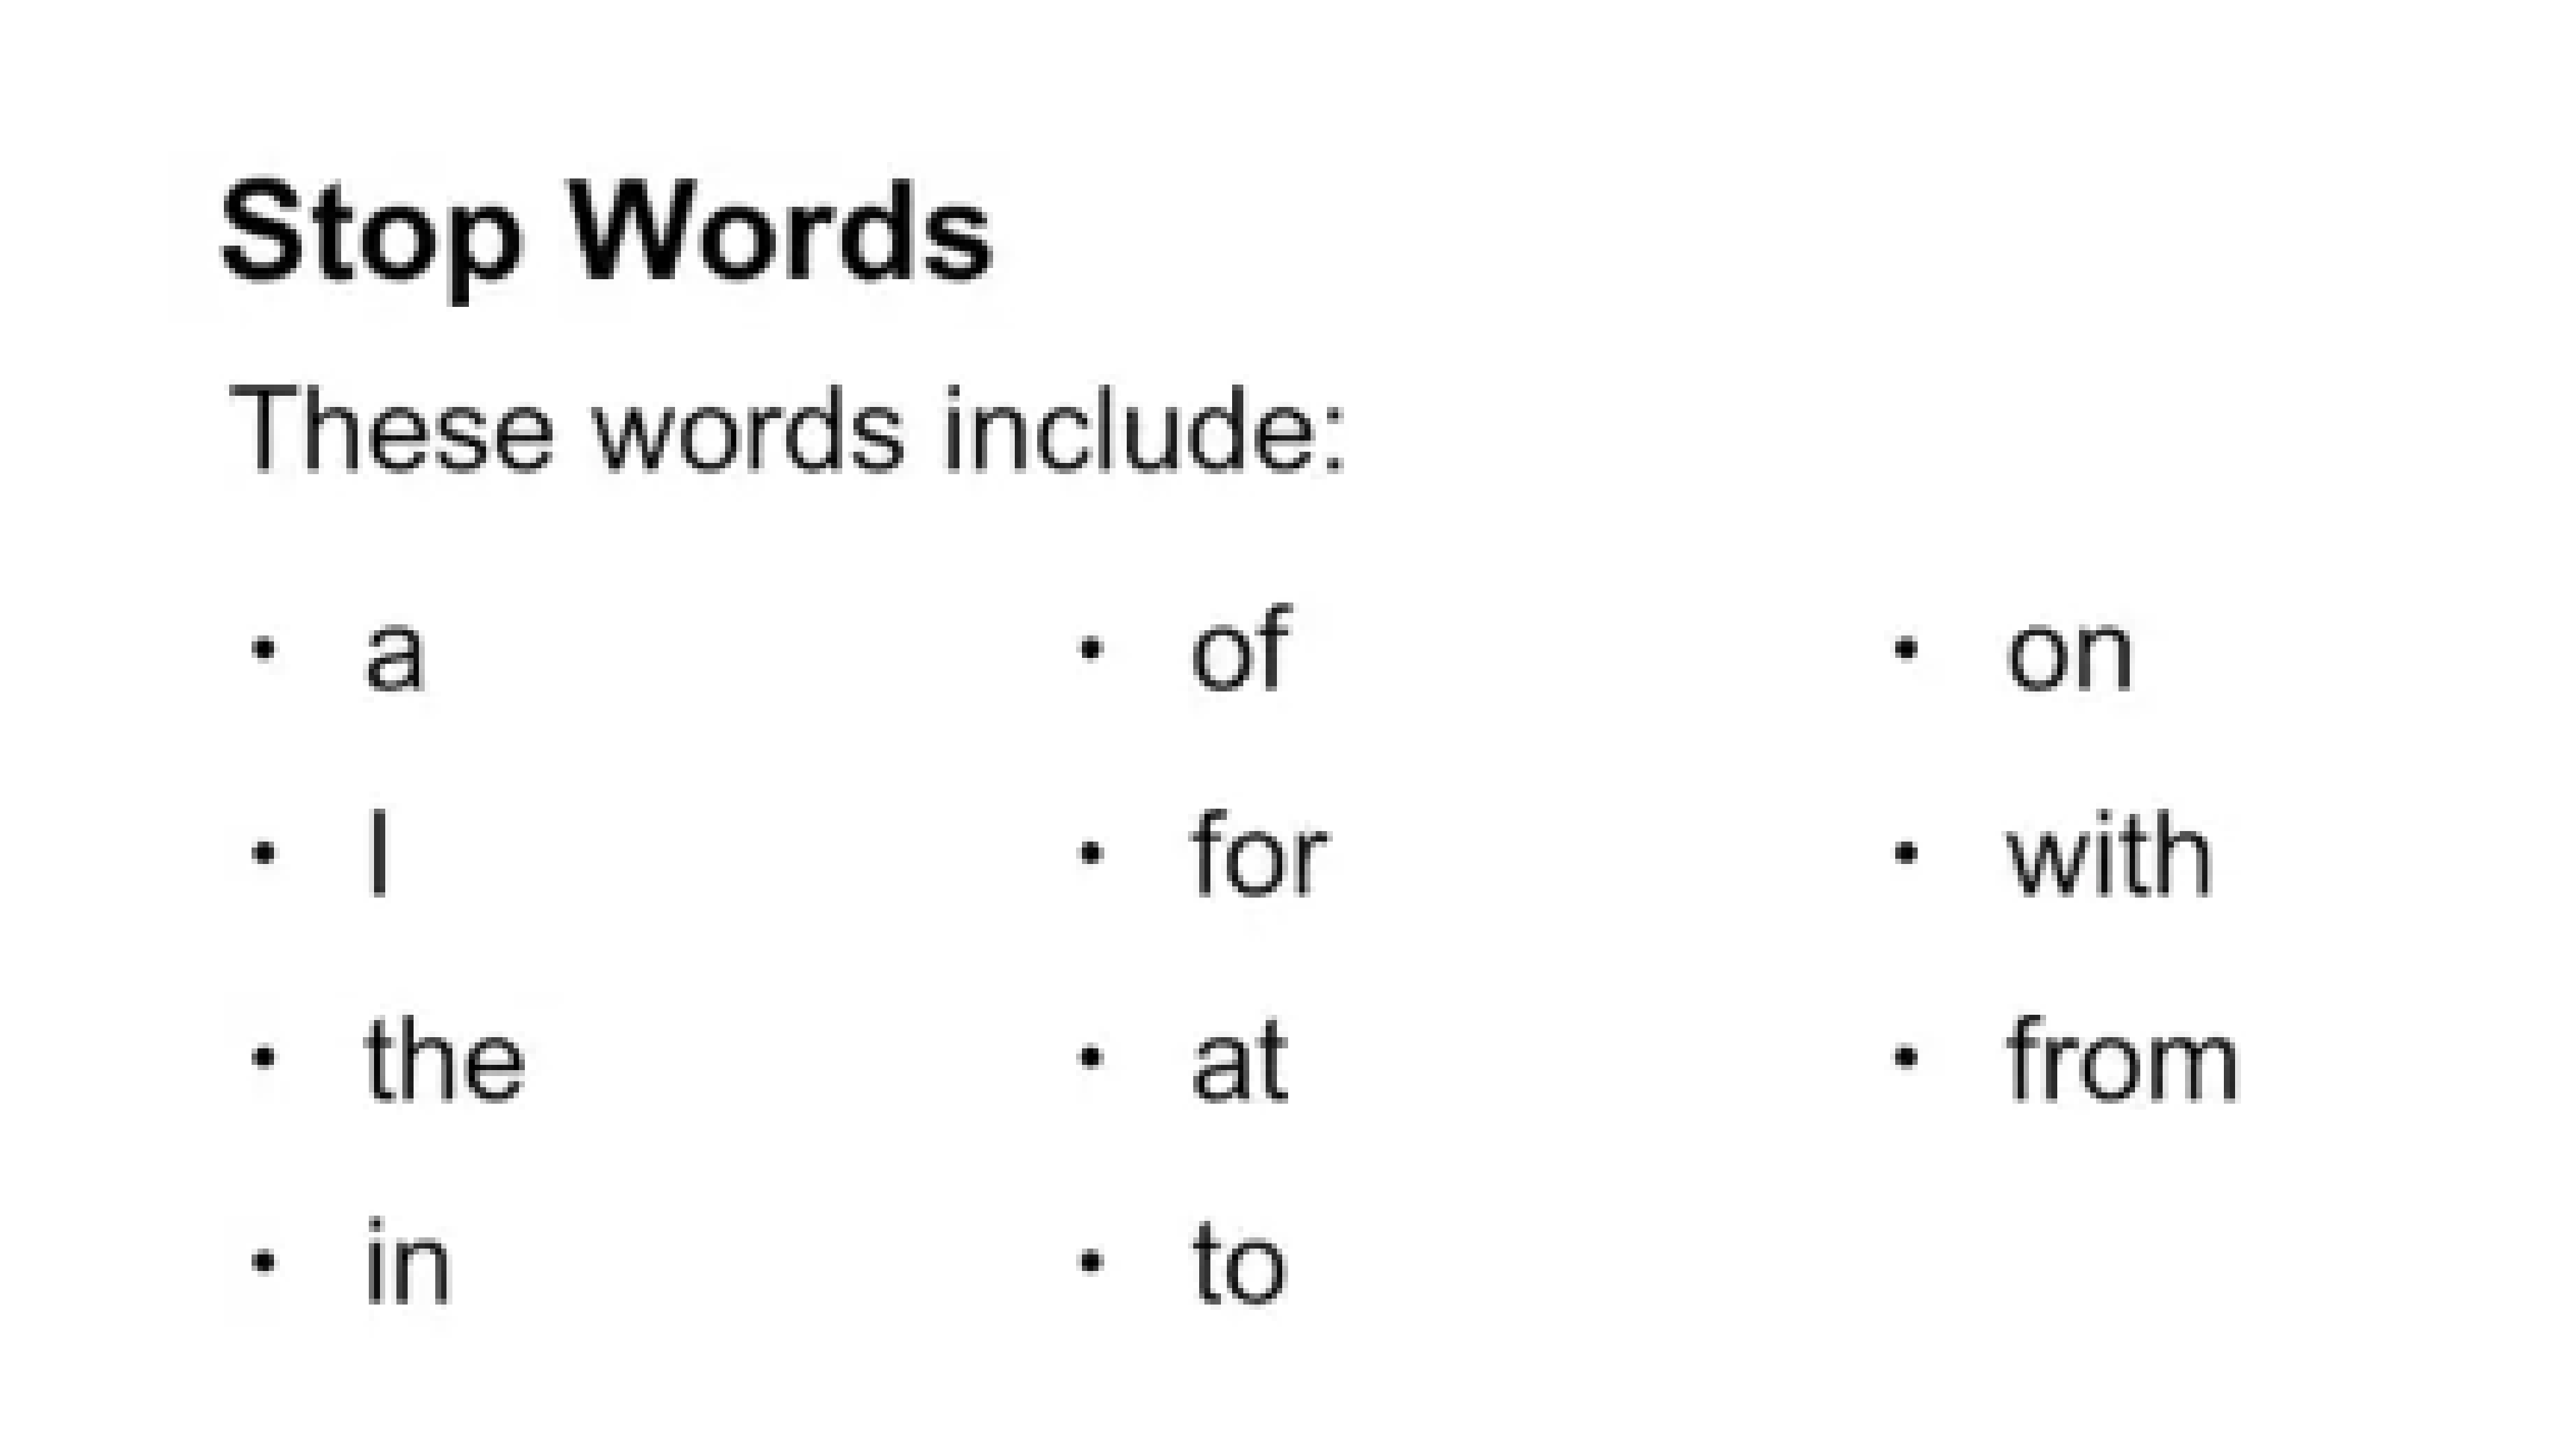

In [11]:
img = mpimg.imread(r"C:\Users\XP STORE\Downloads\Screen-Shot-2016-09-01-at-15.webp")
plt.figure(figsize=(50, 50))
plt.imshow(img)
plt.axis('off')
plt.show()

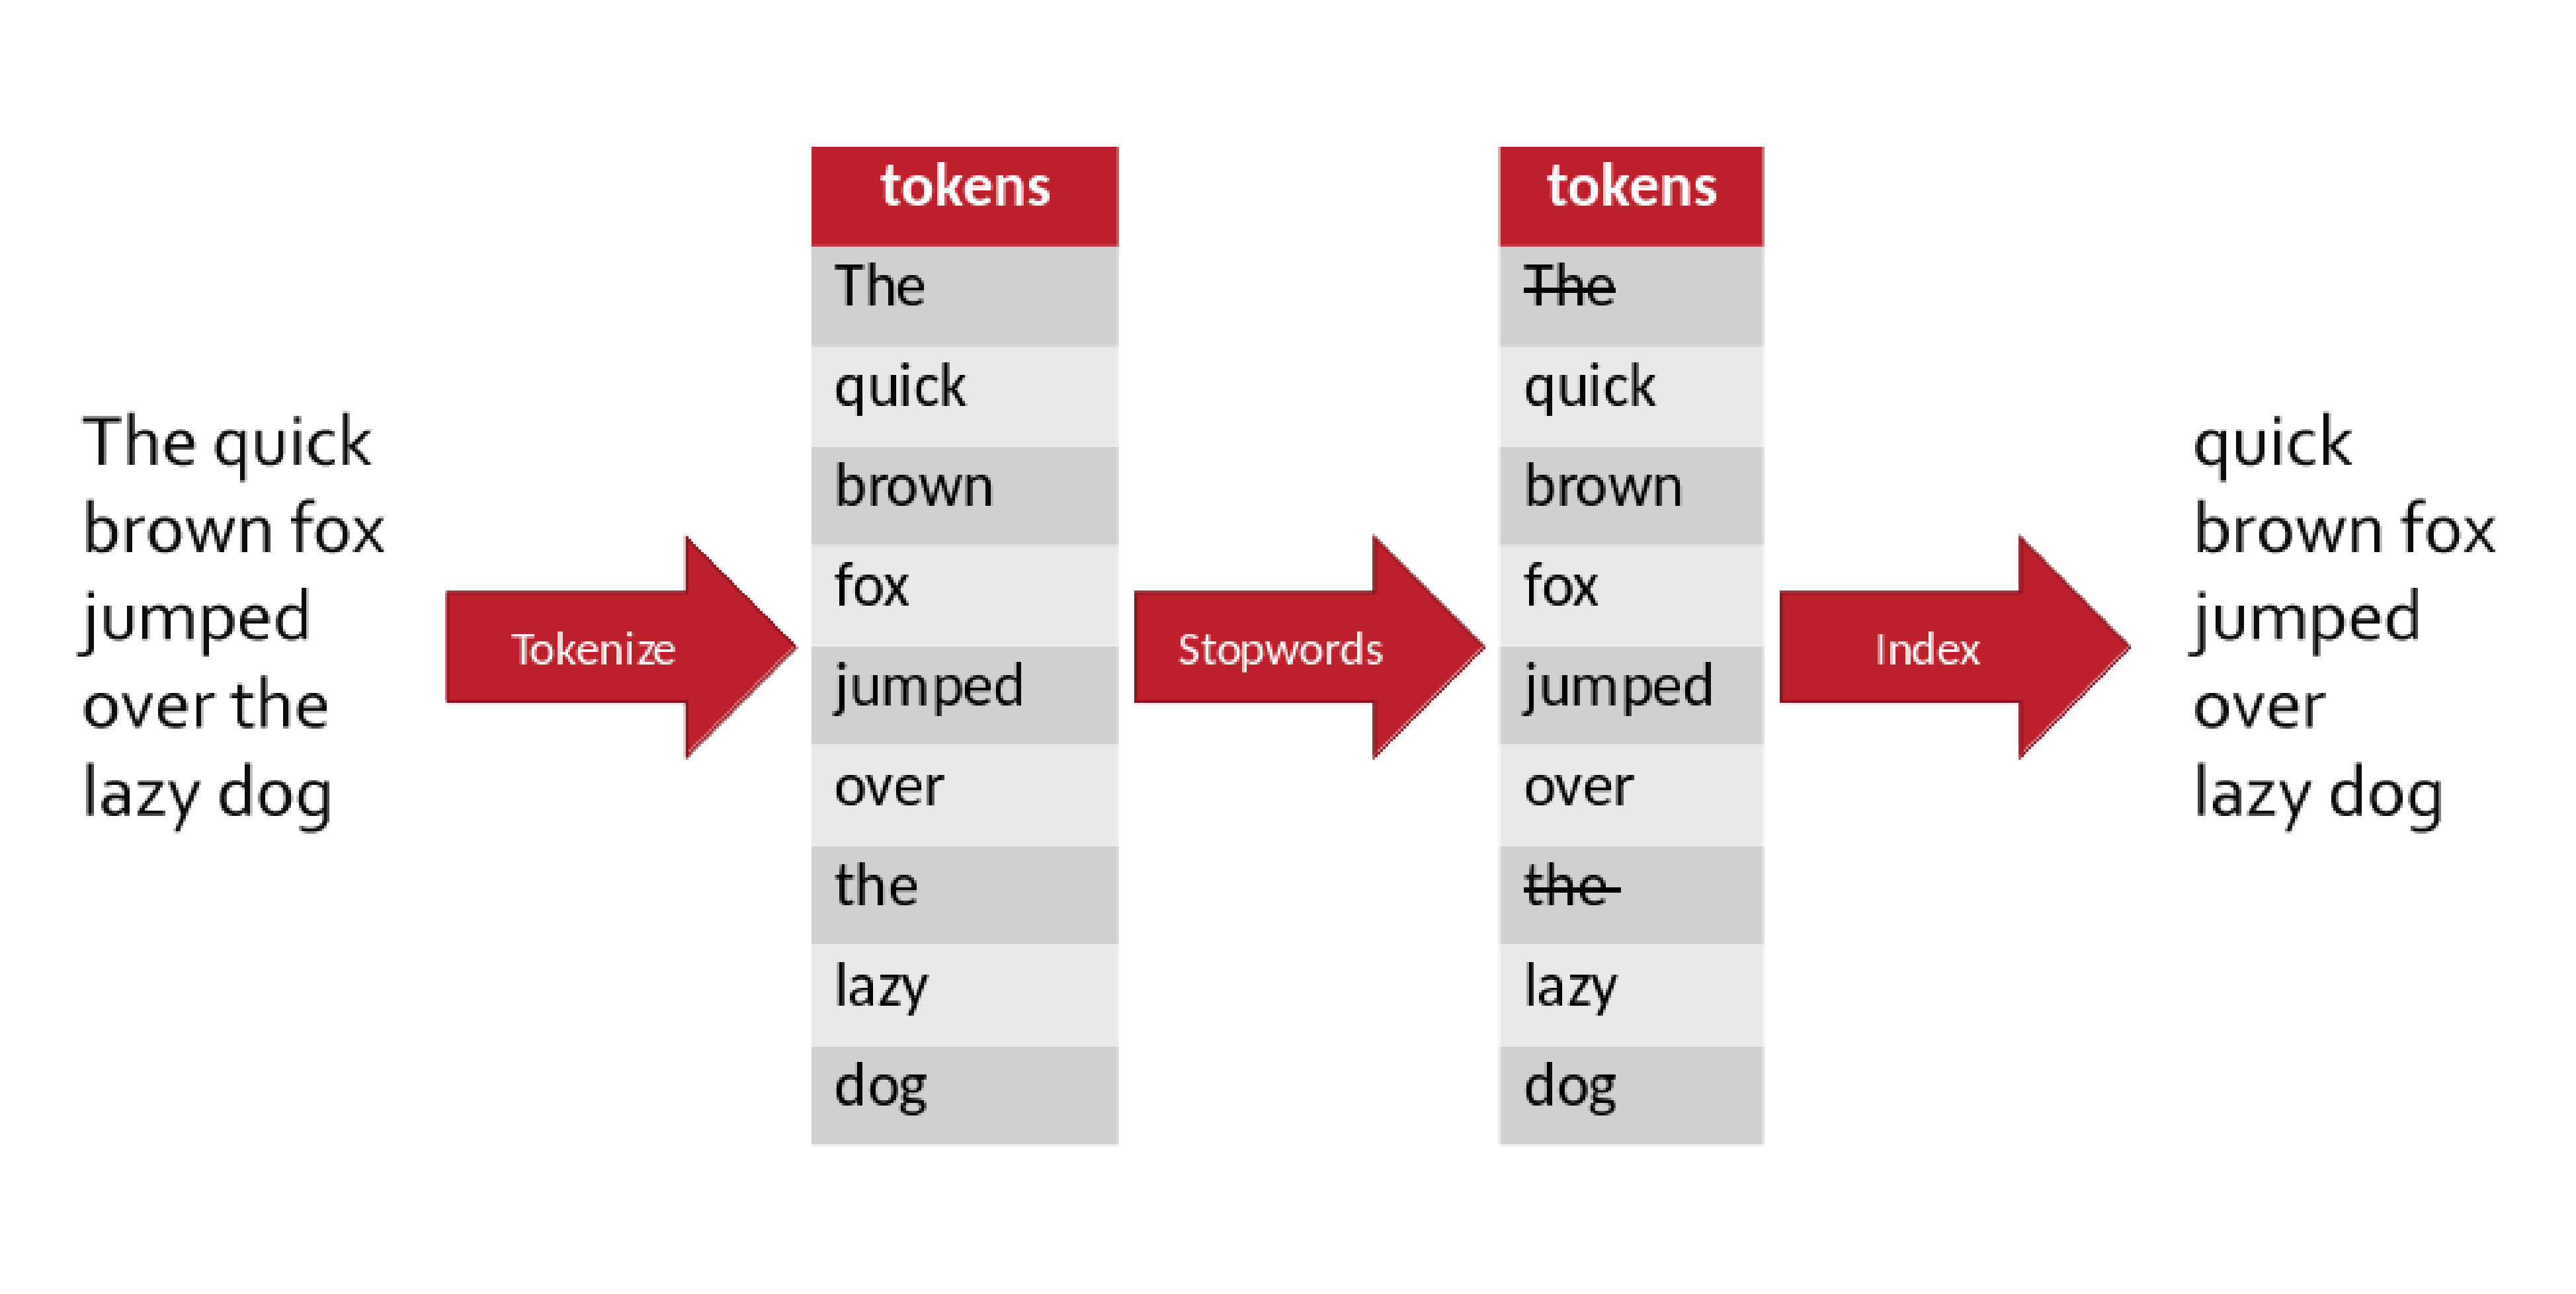

In [12]:
img = mpimg.imread(r"C:\Users\XP STORE\Downloads\stopwords.png")
plt.figure(figsize=(50, 50))
plt.imshow(img)
plt.axis('off')
plt.show()

In [13]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    '''Removes HTML tags: replaces anything between opening and closing <> with empty space'''

    return TAG_RE.sub('', text)

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\XP
[nltk_data]     STORE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

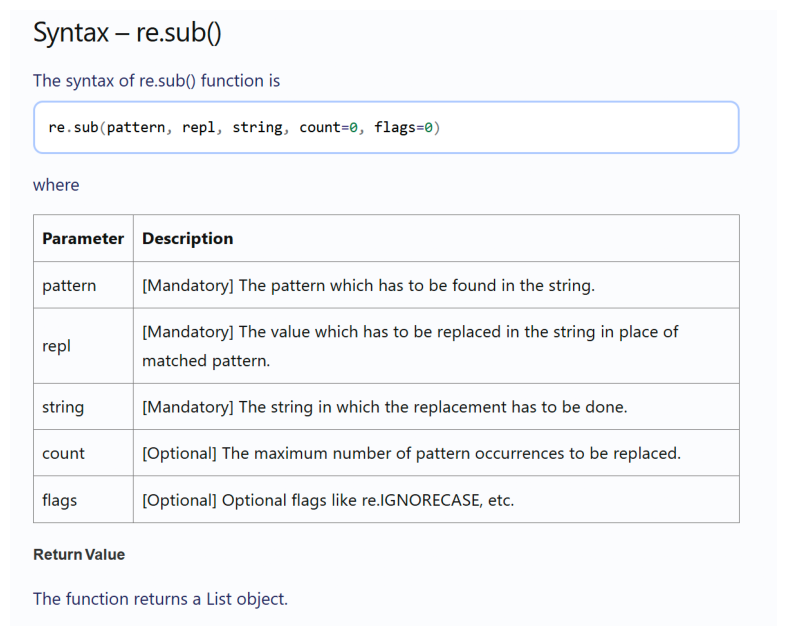

In [15]:
# Read and display local image
img = mpimg.imread(r"G:\Ai\NLP\IMDB\Screenshot 2024-10-24 201913.png")
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [16]:
def preprocess_text(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove html tags
    sentence = remove_tags(sentence)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence

In [17]:
# Calling preprocessing_text function on movie_reviews

X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [18]:
# Sample cleaned up movie review 

X[2]

'thought wonderful way spend time hot summer weekend sitting air conditioned theater watching light hearted comedy plot simplistic dialogue witty characters likable even well bread suspected serial killer may disappointed realize match point risk addiction thought proof woody allen still fully control style many us grown love laughed one woody comedies years dare say decade never impressed scarlet johanson managed tone sexy image jumped right average spirited young woman may crown jewel career wittier devil wears prada interesting superman great comedy go see friends '

In [19]:
# Converting sentiment labels to 0 & 1

y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# The train set will be used to train our deep learning models 
# while test set will be used to evaluate how well our model performs 

In [21]:
# Embedding layer expects the words to be in numeric form 
# Using Tokenizer function from keras.preprocessing.text library
# Method fit_on_text trains the tokenizer 
# Method texts_to_sequences converts sentences to their numeric form

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [22]:
"""
X_train = ["I love movies", "I love watching movies", "movies are amazing"]
"""


"""{
    'i': 1,
    'love': 2,
    'movies': 3,
    'watching': 4,
    'are': 5,
    'amazing': 6
}"""


"{\n    'i': 1,\n    'love': 2,\n    'movies': 3,\n    'watching': 4,\n    'are': 5,\n    'amazing': 6\n}"

In [23]:
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist

vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

92394

In [24]:
'''
texts = [
    "The cat sat on the mat",
    "The dog ran in the park",
    "A cat and a dog play"
]

Word Index: {'the': 1, 'cat': 2, 'a': 3, 'dog': 4, 'on': 5, 'mat': 6, 'in': 7, 'park': 8, 'and': 9, 'play': 10}

# New text with unknown words
new_text = ["The elephant walks in garden"]
'''

'\ntexts = [\n    "The cat sat on the mat",\n    "The dog ran in the park",\n    "A cat and a dog play"\n]\n\nWord Index: {\'the\': 1, \'cat\': 2, \'a\': 3, \'dog\': 4, \'on\': 5, \'mat\': 6, \'in\': 7, \'park\': 8, \'and\': 9, \'play\': 10}\n\n# New text with unknown words\nnew_text = ["The elephant walks in garden"]\n'

In [25]:
# Padding all reviews to fixed length 100

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [26]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()                                 # Create empty dictionary to store word embeddings
for line in glove_file:                                        # Read the GloVe file line by line
    records = line.split()                                     # Split line into individual elements
    word = records[0]                                          # First element is the word
    vector_dimensions = asarray(records[1:], dtype='float32')  # Convert remaining elements to float array
    embeddings_dictionary[word] = vector_dimensions            # Store word and its vector
glove_file.close()                                             # Close the file when done

In [27]:
'''
Processing word: the
Split records: ['the', '0.418', '0.24968', '-0.41242', '0.1217']
Vector dimensions: [ 0.418    0.24968  -0.41242   0.1217  ]

Processing word: cat
Split records: ['cat', '0.013441', '-0.23763', '-0.16765', '0.40038']
Vector dimensions: [ 0.013441 -0.23763  -0.16765   0.40038 ]

Processing word: dog
Split records: ['dog', '-0.24776', '-0.12961', '0.29996', '-0.35850']
Vector dimensions: [-0.24776 -0.12961  0.29996 -0.3585 ]

Final embeddings dictionary:
the: [ 0.418    0.24968  -0.41242   0.1217  ]
cat: [ 0.013441 -0.23763  -0.16765   0.40038 ]
dog: [-0.24776 -0.12961  0.29996 -0.3585 ]
'''

"\nProcessing word: the\nSplit records: ['the', '0.418', '0.24968', '-0.41242', '0.1217']\nVector dimensions: [ 0.418    0.24968  -0.41242   0.1217  ]\n\nProcessing word: cat\nSplit records: ['cat', '0.013441', '-0.23763', '-0.16765', '0.40038']\nVector dimensions: [ 0.013441 -0.23763  -0.16765   0.40038 ]\n\nProcessing word: dog\nSplit records: ['dog', '-0.24776', '-0.12961', '0.29996', '-0.35850']\nVector dimensions: [-0.24776 -0.12961  0.29996 -0.3585 ]\n\nFinal embeddings dictionary:\nthe: [ 0.418    0.24968  -0.41242   0.1217  ]\ncat: [ 0.013441 -0.23763  -0.16765   0.40038 ]\ndog: [-0.24776 -0.12961  0.29996 -0.3585 ]\n"

In [28]:
# Create Embedding Matrix having 100 columns 
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

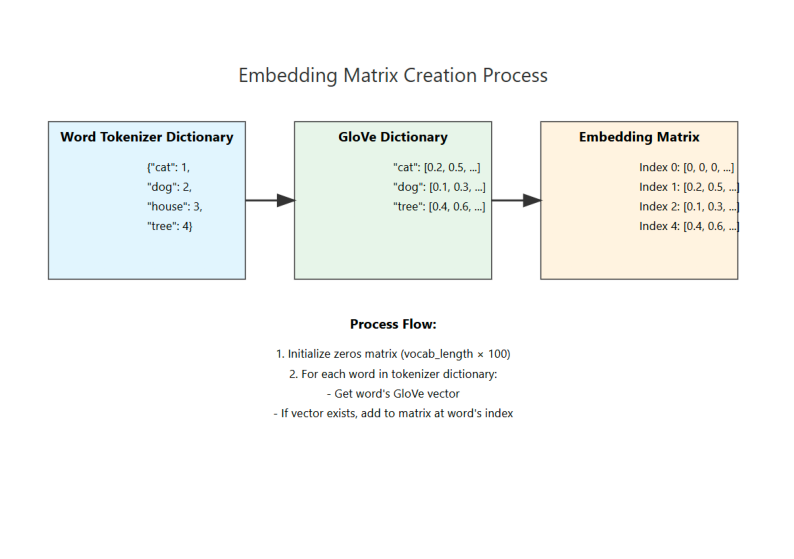

In [29]:
# Read and display local image
img = mpimg.imread(r"G:\Ai\NLP\IMDB\Screenshot 2024-11-05 003258.png")
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [30]:
embedding_matrix.shape

(92394, 100)

In [31]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dropout, GlobalMaxPooling1D, Dense, BatchNormalization
from keras import regularizers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the model
cnn_model = Sequential()

# Embedding Layer
cnn_model.add(Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False))

# 1st Conv1D + MaxPooling + BatchNormalization
cnn_model.add(Conv1D(128, 5, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling1D(pool_size=2))

# 2nd Conv1D + MaxPooling + BatchNormalization
cnn_model.add(Conv1D(64, 5, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling1D(pool_size=2))

# Bidirectional LSTM
cnn_model.add(Bidirectional(LSTM(64, return_sequences=True)))

# Dropout after LSTM
cnn_model.add(Dropout(0.5))

# Global Max Pooling
cnn_model.add(GlobalMaxPooling1D())

# Dense Layer with L2 Regularization and BatchNormalization
cnn_model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(BatchNormalization())

# Dropout after Dense
cnn_model.add(Dropout(0.5))

# Output Layer (Sigmoid for binary classification)
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks: EarlyStopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5)

# Fit the model with callbacks
history = cnn_model.fit(X_train, y_train, 
                        epochs=10, 
                        batch_size=32, 
                        validation_data=(X_test, y_test), 
                        callbacks=[early_stopping, reduce_lr])

# Display the model summary
cnn_model.summary()

C:\Users\XP STORE\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.7304 - loss: 2.3996 - val_accuracy: 0.7992 - val_loss: 0.6412 - learning_rate: 0.0010
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.8167 - loss: 0.5438 - val_accuracy: 0.7805 - val_loss: 0.5722 - learning_rate: 0.0010
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.8272 - loss: 0.4838 - val_accuracy: 0.7346 - val_loss: 0.5827 - learning_rate: 0.0010
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.8298 - loss: 0.4657 - val_accuracy: 0.8210 - val_loss: 0.4971 - learning_rate: 0.0010
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.8405 - loss: 0.4387 - val_accuracy: 0.8146 - val_loss: 0.5117 - learning_rate: 0.0010
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.8401 - loss: 0.4405 - val_accuracy: 0.8218 - val_loss: 0.5052 - learning_rate: 0.0010
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accura

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (32, 100, 100)              │       9,239,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (32, 96, 128)               │          64,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (32, 96, 128)               │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (32, 48, 128)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (32, 44, 64)                │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (32, 44, 64)                │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (32, 22, 64)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (32, 22, 128)               │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 22, 128)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (32, 128)                   │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 128)                   │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (32, 128)                   │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (32, 128)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 1)                     │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,805,485 (37.40 MB)

 Trainable params: 188,481 (736.25 KB)

 Non-trainable params: 9,240,040 (35.25 MB)

 Optimizer params: 376,964 (1.44 MB)

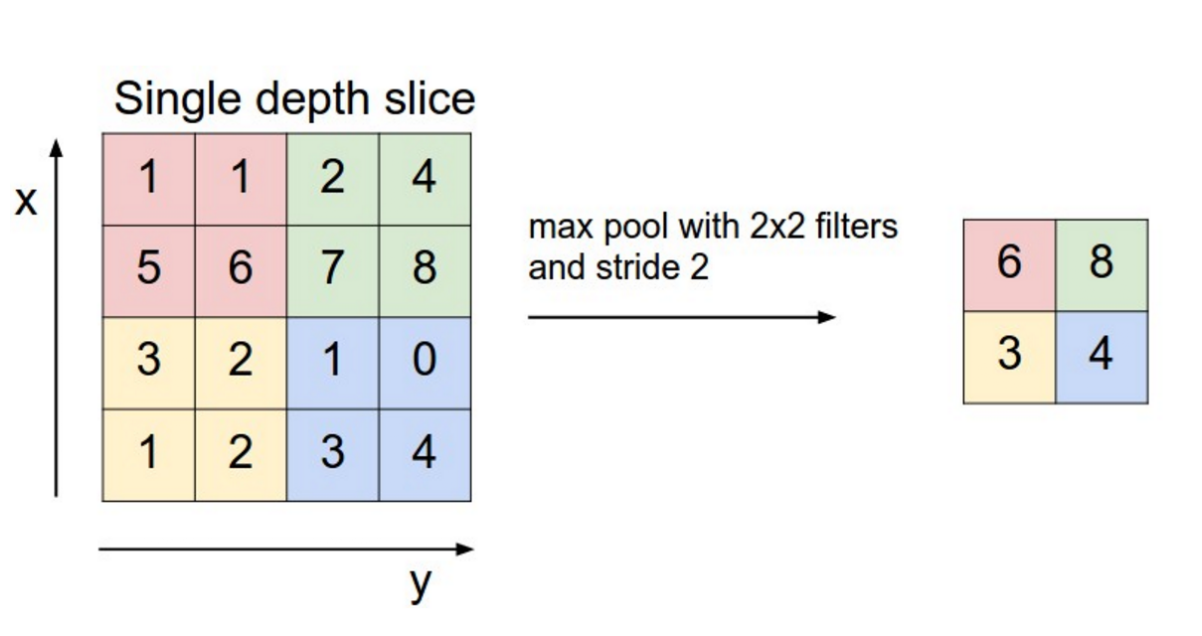

In [32]:
# Read and display local image
img = mpimg.imread(r"G:\Ai\NLP\IMDB\Screen-Shot-2015-11-05-at-2.18.38-PM.png"
)
plt.figure(figsize=(20, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

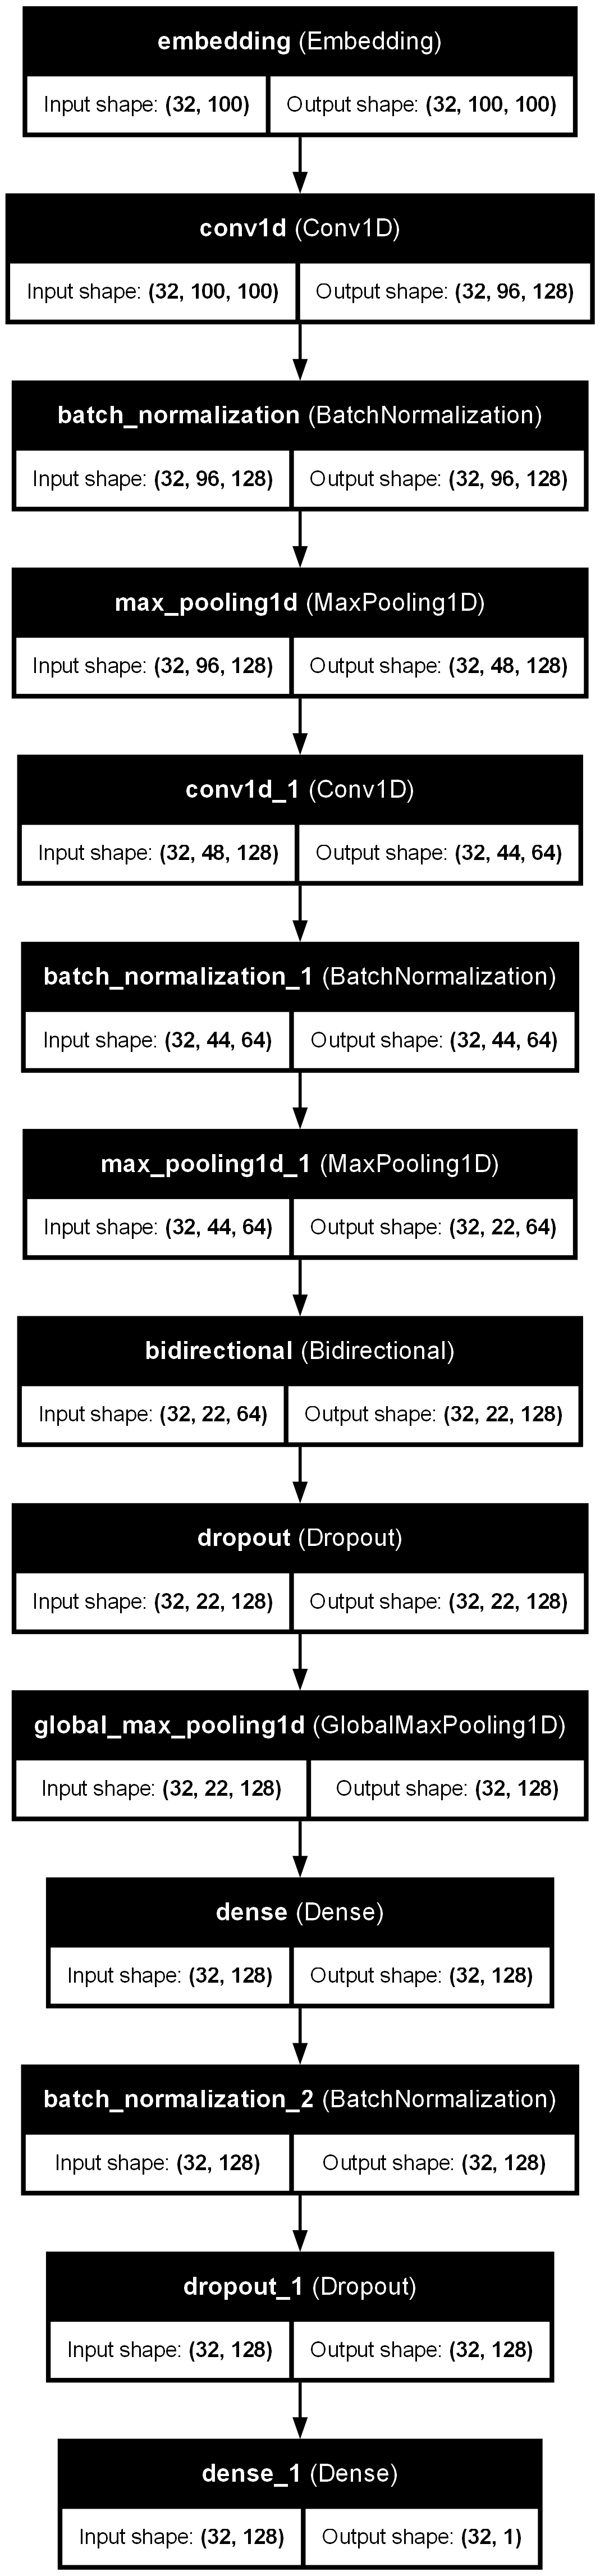

In [33]:
# Create model visualization
plot_model(cnn_model, 
          to_file='model_architecture.png',
          show_shapes=True,
          show_layer_names=True,
          rankdir='TB')

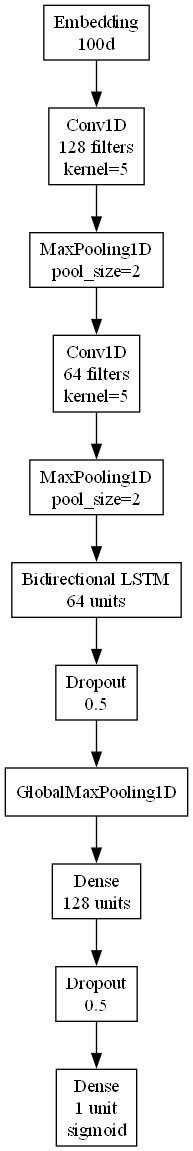

In [34]:
def visualize_network_architecture():
    dot = graphviz.Digraph(comment='Neural Network Architecture')
    dot.attr(rankdir='TB')
    
    # Add nodes for each layer
    layers = [
        ('Embedding', 'Embedding\n100d'),
        ('Conv1D_1', 'Conv1D\n128 filters\nkernel=5'),
        ('MaxPool_1', 'MaxPooling1D\npool_size=2'),
        ('Conv1D_2', 'Conv1D\n64 filters\nkernel=5'),
        ('MaxPool_2', 'MaxPooling1D\npool_size=2'),
        ('BiLSTM', 'Bidirectional LSTM\n64 units'),
        ('Dropout_1', 'Dropout\n0.5'),
        ('GlobalMaxPool', 'GlobalMaxPooling1D'),
        ('Dense_1', 'Dense\n128 units'),
        ('Dropout_2', 'Dropout\n0.5'),
        ('Output', 'Dense\n1 unit\nsigmoid')
    ]
    
    # Add nodes
    for i, (name, label) in enumerate(layers):
        dot.node(name, label, shape='box')
        
        # Add edges
        if i > 0:
            dot.edge(layers[i-1][0], name)
    
    return dot

# Create and display the visualization
network_viz = visualize_network_architecture()
network_viz.render('network_architecture', format='png', cleanup=True)
display(Image(filename='network_architecture.png'))

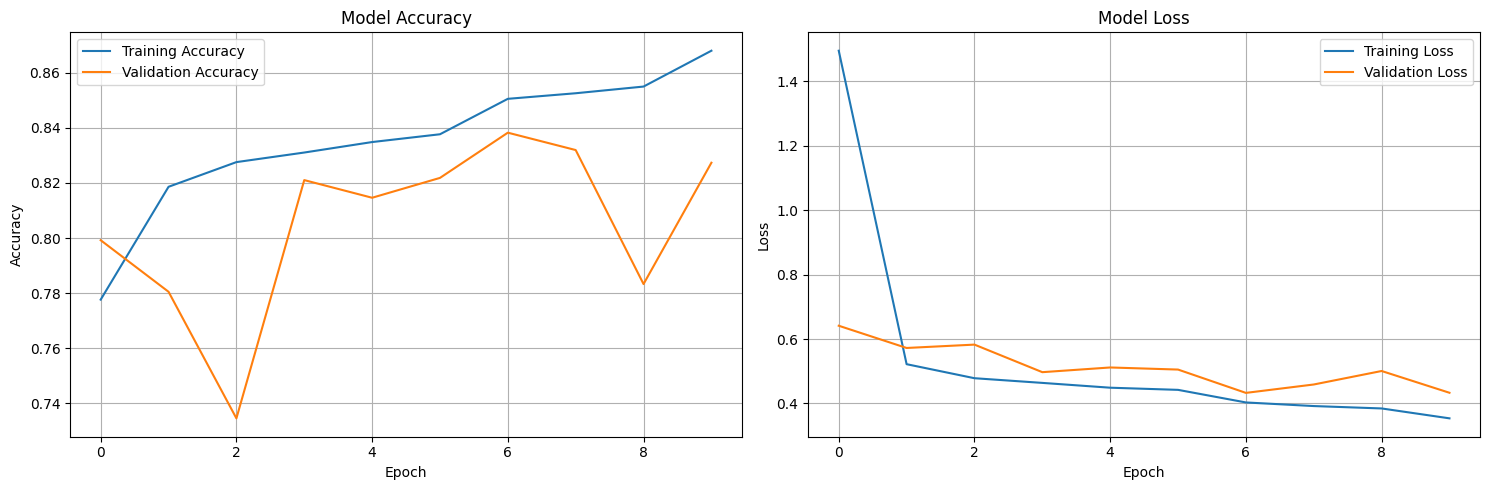

In [35]:
def plot_training_history(history):
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)
    
    # Plot loss
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

# Use the function
plot_training_history(history)

In [36]:
# Predictions on the Test Set

score = cnn_model.evaluate(X_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8366 - loss: 0.4333


In [37]:
print(X_train.shape)  # Should be (num_samples, maxlen)
print(y_train.shape)  # Should be (num_samples,)

(40000, 100)
(40000,)


In [38]:
# Now we will test our model to a csv file with unseen reviews 
# Load the CSV file
DATA_unseen_reviews = pd.read_csv('a3_IMDb_Unseen_Reviews.csv')


reviews = DATA_unseen_reviews['Review Text'].values

# Preprocess the reviews: Tokenize and pad
sequences = word_tokenizer.texts_to_sequences(reviews)  # Convert text to sequences
padded_reviews = pad_sequences(sequences, maxlen=maxlen)  # Pad sequences to the maxlen used in training

# Make predictions
predictions = cnn_model.predict(padded_reviews)

# Classify reviews based on a threshold (e.g., 0.5)
predicted_labels = (predictions > 0.5).astype(int)

# Add predictions to the DataFrame
DATA_unseen_reviews['predicted_label'] = predicted_labels

# Save the results to a new CSV file
DATA_unseen_reviews.to_csv('new_reviews_with_predictions.csv', index=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


In [39]:
new_reviews_with_predictions = pd.read_csv('new_reviews_with_predictions.csv')

In [40]:
new_reviews_with_predictions.head(5)

Unnamed: 0       Movie                                        Review Text  \
0           0  Ex Machina  Intelligent Movie.\nThis movie is obviously al...   
1           1  Ex Machina  Extraordinary and thought-provoking.\n'Ex mach...   
2           2  Ex Machina  Poor story, only reasonable otherwise.\nIf I h...   
3           3  Ex Machina  Had Great Potential.\nThis movie is one of the...   
4           4    Eternals  Amazing visuals and philosophical concepts!\n\...   

   IMDb Rating  predicted_label  
0            9                1  
1           10                1  
2            3                0  
3            1                0  
4           10                1

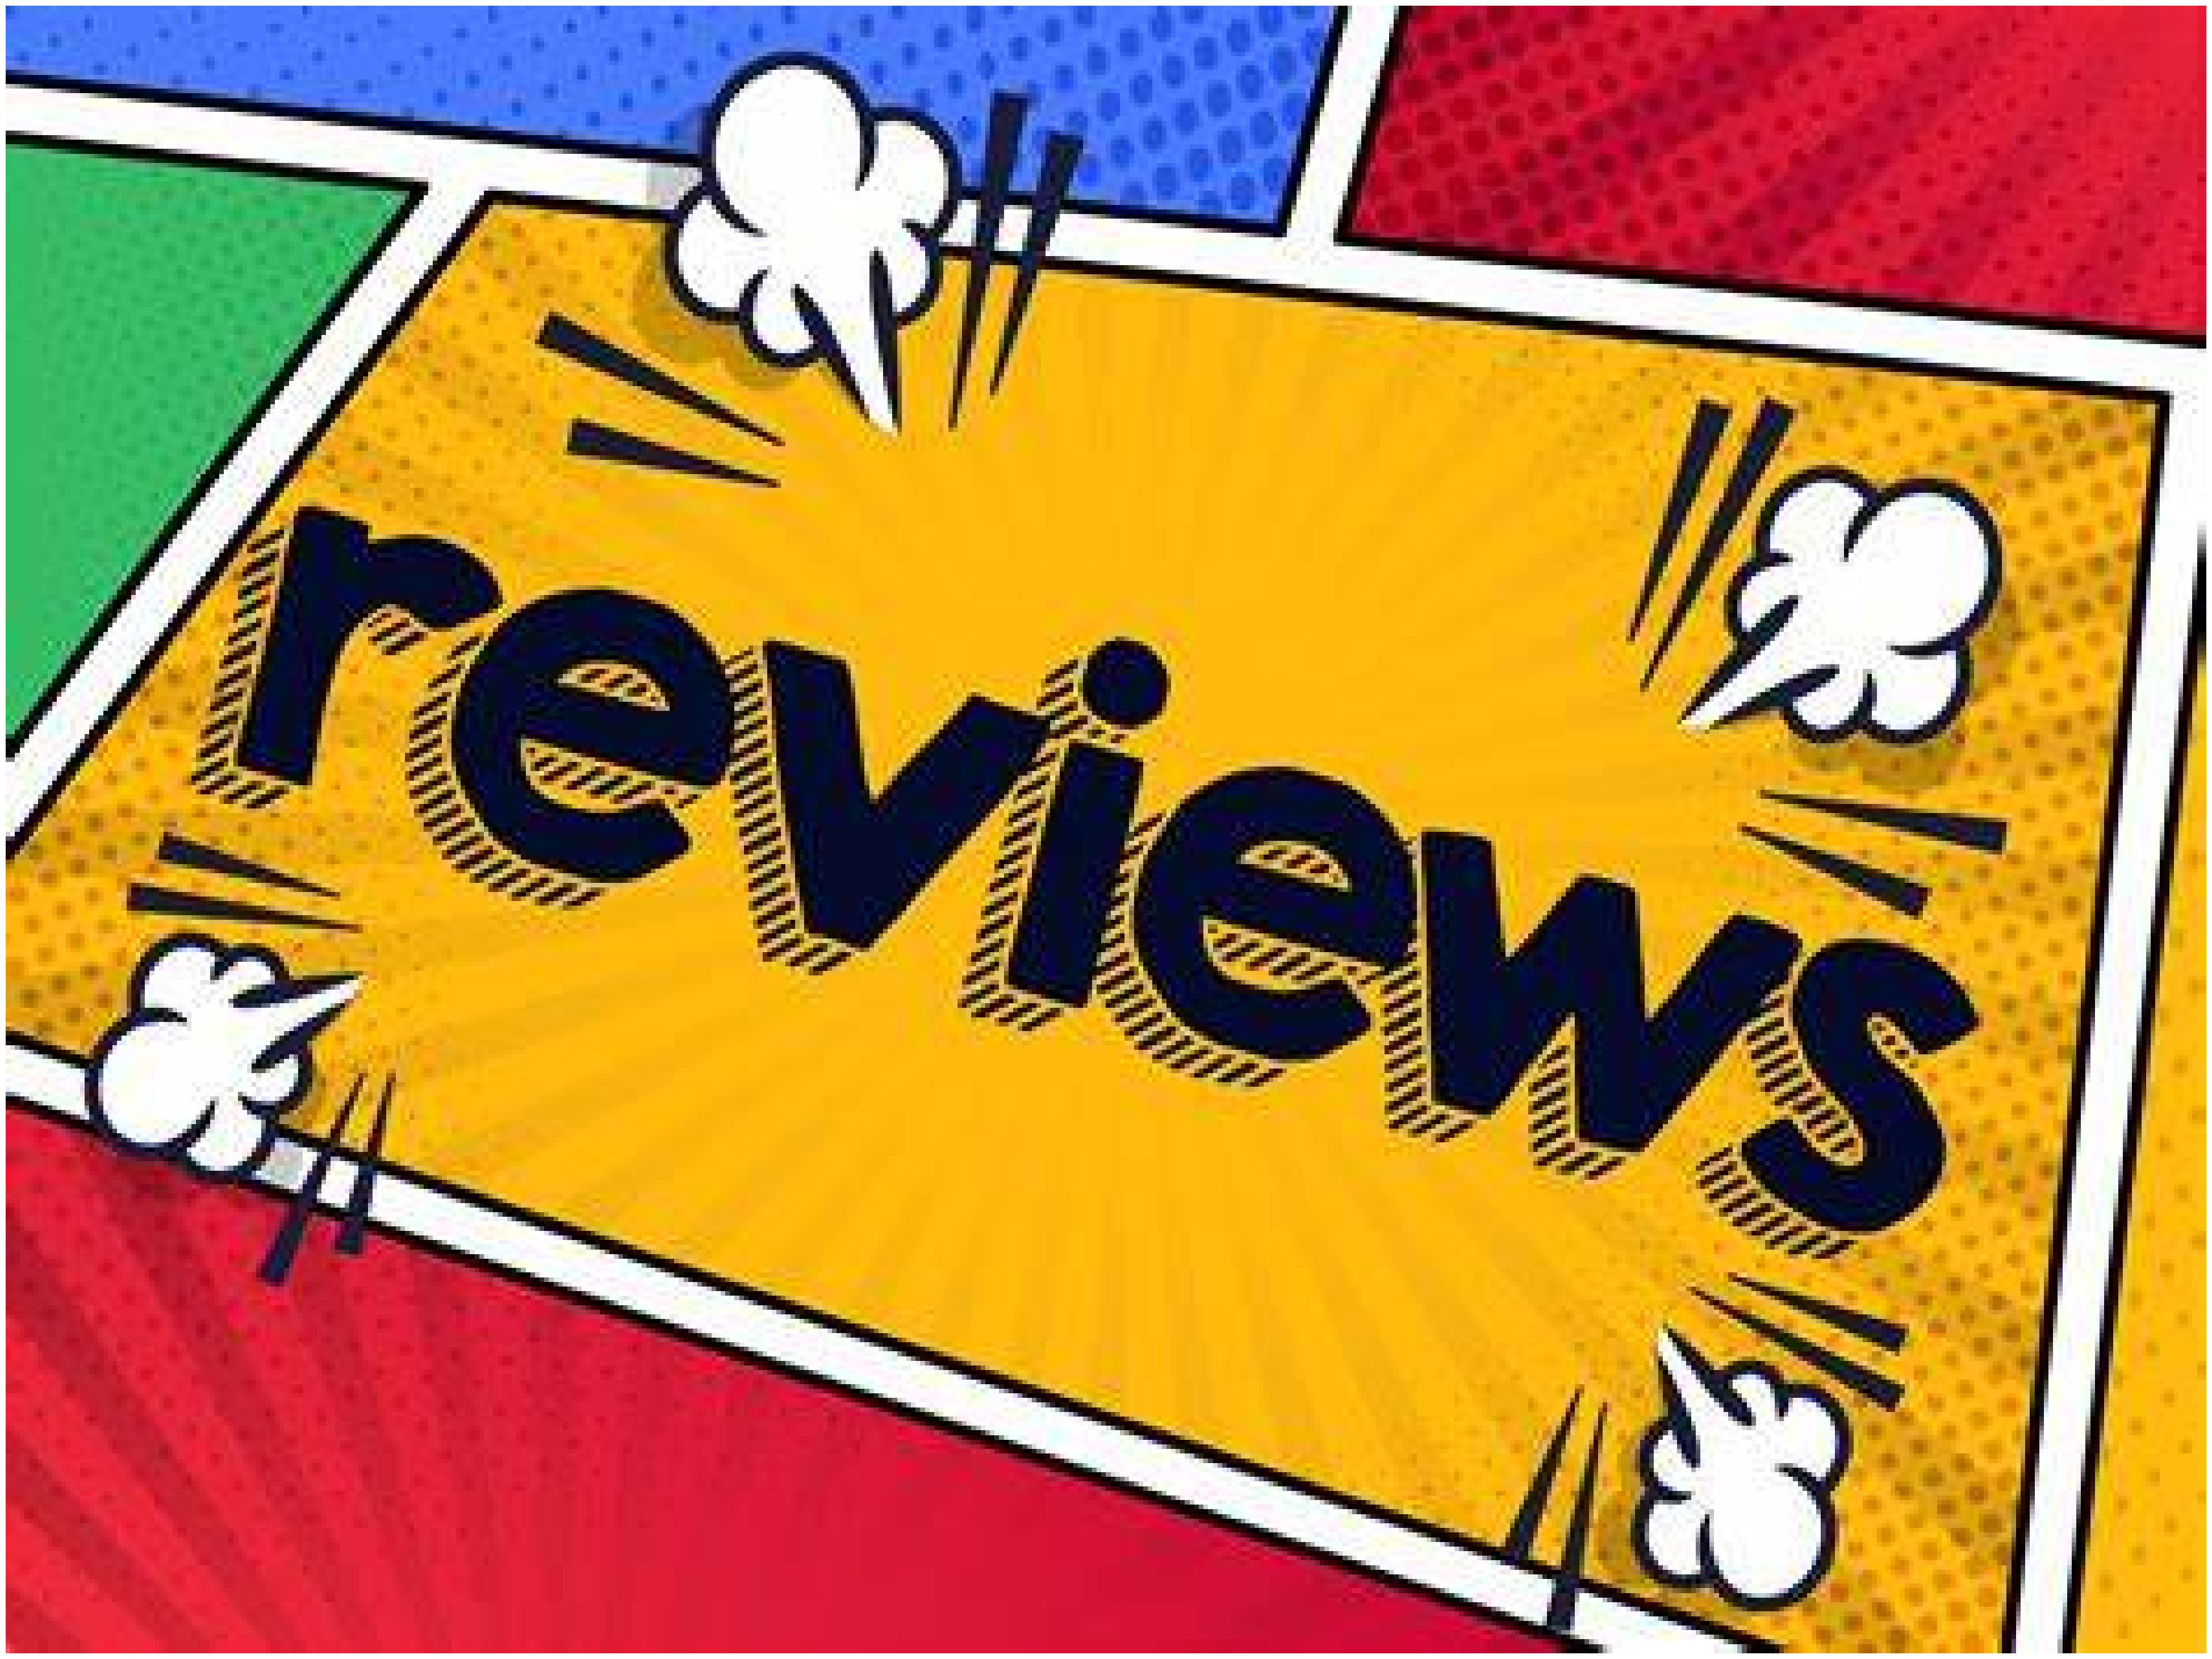

Please enter your review:  I got so much bored watching this movie , I regret entering cinema for it actually


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[0.29642272]
The review is Negative.


In [45]:
def preprocess_review(review, tokenizer, maxlen):
    """Tokenizes and pads the input review."""
    review_sequence = tokenizer.texts_to_sequences([review])
    padded_sequence = pad_sequences(review_sequence, padding='post', maxlen=maxlen)
    return padded_sequence
    
img = mpimg.imread(r"C:\Users\XP STORE\Downloads\OIP.jpeg")
plt.figure(figsize=(50, 50))
plt.imshow(img)
plt.axis('off')
plt.show()
# Get input from the user
user_review = input("Please enter your review: ")

# Preprocess the input review
padded_review = preprocess_review(user_review, word_tokenizer, maxlen)

# Make a prediction
prediction = cnn_model.predict(padded_review)
print(prediction[0])
# Convert prediction to positive or negative
if prediction[0] > 0.65:
    print("The review is Positive.")
else:
    print("The review is Negative.")
    

In [42]:
cnn_model.save("model.keras")

In [43]:
loaded_model = keras.saving.load_model("model.keras")

In [44]:
loaded_model.predict(preprocess_review('Too long, too slow, and the ending was completely underwhelming',word_tokenizer,100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


array([[0.6566261]], dtype=float32)